In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import interpolate

* A = Acetone
* B = Benzene

In [2]:
rho_A = 729 # kg/m^3
rho_B = 879 # kg/m^3

# ? Molecular weight
M_A = 58.08 # g/mol
M_B = 78.11 # g/molg/mol

# Calibration curve


In [3]:
# Volume ratio
VR = [9/1, 8/2, 7/3, 6/4, 5/5, 4/6, 3/7, 2/8, 1/9]
VR = np.array(VR)
VR = VR * (rho_A / M_A) / (rho_B / M_B)
VR_A = [(r / (r+1.0)) for r in VR]
VR_A = [1.0, *VR_A, 0.0]

# x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
x_A = np.array(VR_A)
print("Mole fraction of Acetone: ", x_A)

RI_1 = [1.351791, 1.364765, 1.38243, 1.400394, 1.416661, 1.437419,
    1.443108, 1.454685, 1.471052, 1.484525, 1.491711]

RI_2 = [1.351891, 1.364765, 1.382929, 1.399296, 1.415763, 
        1.43732, 1.445004, 1.4472, 1.471551, 1.483427, 1.492709]

RI_3 = [1.351691, 1.364066, 1.383827, 1.400593, 1.417459, 1.440513,
    1.443607, 1.454884, 1.471351, 1.484425, 1.49201]

y = np.mean([RI_1, RI_2, RI_3], axis=0)


Mole fraction of Acetone:  [1.         0.90940653 0.81689935 0.72241717 0.62589606 0.5272693
 0.42646723 0.32341707 0.21804277 0.11026481 0.        ]


slope: [-0.14296434], intercept: 1.5009384465620594


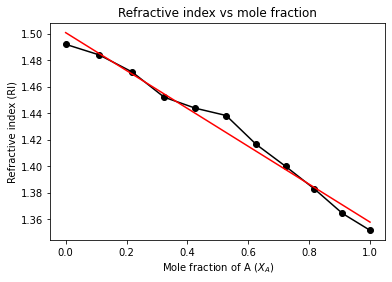

In [4]:
reg = LinearRegression().fit(x_A.reshape(-1, 1), y)
m = reg.coef_
c = reg.intercept_

y_pred = m*x_A + c

plt.title('Refractive index vs mole fraction')
plt.xlabel('Mole fraction of A ($X_A$)')
plt.ylabel('Refractive index (RI)')
plt.plot(x_A, y, 'o-k')
plt.plot(x_A, y_pred, '-r')

print(f"slope: {reg.coef_}, intercept: {reg.intercept_}")

In [5]:
T = [58.2, 59.9, 60.8, 63.0, 65.2, 68.1]
T = np.array(T)
T += 273.15

RI_vap_1 = [1.376541, 1.395104, 1.404485, 1.407679, 1.431531, 1.442809]
RI_vap_2 = [1.375044, 1.396002, 1.399895, 1.414266, 1.431831, 1.445703]
RI_vap_3 = [1.375344, 1.395803, 1.400693, 1.414665, 1.429635, 1.446701]
RI_vap = np.mean([RI_vap_1, RI_vap_2, RI_vap_3], axis=0)
Y_A = (RI_vap - c) / m
Y_B = 1 - Y_A

RI_liq_1 = [1.382729, 1.403787, 1.434326, 1.444006, 1.449495, 1.473048]
RI_liq_2 = [1.381831, 1.407579, 1.436621, 1.441611, 1.450194, 1.473747]
RI_liq_3 = [1.385324, 1.408178, 1.436222, 1.443507, 1.450793, 1.472649]
RI_liq = np.mean([RI_liq_1, RI_liq_2, RI_liq_3], axis=0)
X_A = (RI_liq - c) / m
X_B = 1 - X_A

print("Average mole fraction of vapour A (at various temp):", Y_A)
print("Average mole fraction of liquid A (at various temp):", X_A)


Average mole fraction of vapour A (at various temp): [0.87641051 0.73656211 0.69421122 0.62068006 0.48920905 0.3907789 ]
Average mole fraction of liquid A (at various temp): [0.822889   0.66047087 0.45616584 0.40497592 0.35517795 0.19438727]


# Calculate $P_{sat}$

* Antoine Equation: $log_{10}(P) = A − \frac{B}{T + C}$

## Acetone

* A = 4.42448
* B = 1312.253
* C = -32.445
* reference: *Ambrose, Sprake, et al., 1974*

## Benzene

* A = 4.725
* B = 1660.652
* C = -1.461
* reference: *Eon, Pommier, et al., 1971*


In [6]:

log10_Psat_A = 4.424 - 1312.25 / (T - 32.44)
Psat_A = np.power(10, log10_Psat_A)
# log10_Psat_A = 14.314 - 2756.22 / (T + 228.0)
# Psat_A = np.exp(log10_Psat_A) / 100
print("Saturation pressure of Acetone:", Psat_A)

log10_Psat_B = 4.725 - 1660.65 / (T - 1.46)
Psat_B = np.power(10, log10_Psat_B)
# log10_Psat_B = 13.72 - 2726.65 / (T + 217.57)
# Psat_B = np.exp(log10_Psat_B) / 100
print("Saturation pressure of Benzene:", Psat_B)


Saturation pressure of Acetone: [1.08114159 1.14474676 1.17961343 1.26842971 1.36250982 1.49493862]
Saturation pressure of Benzene: [0.49096359 0.52102362 0.5375436  0.57975479 0.62466361 0.68820318]


$$
\gamma_A = \frac{Y_A \cdot \pi_A}{P_A \cdot X_A}
$$


In [7]:

gamma_A = (Y_A * 1) / (Psat_A * X_A)
ln_gamma_A = np.log(gamma_A)
print("ln(gamma_A):", ln_gamma_A)

# Psat_B *= 1.3
gamma_B = (Y_B * 1) / (Psat_B * X_B)
ln_gamma_B = np.log(gamma_B)
print("ln(gamma_B):", ln_gamma_B)


ln(gamma_A): [-0.01500423 -0.0261429   0.25473305  0.18920846  0.01084251  0.2962044 ]
ln(gamma_B): [0.35157418 0.39821779 0.04499565 0.09492817 0.23752803 0.09424926]


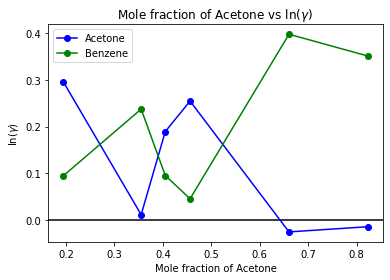

In [8]:
plt.axhline(y=0, color='k')
plt.plot(X_A, ln_gamma_A, 'o-b', label="Acetone")
plt.plot(X_A, ln_gamma_B, 'o-g', label="Benzene")
plt.legend()
plt.xlabel("Mole fraction of Acetone")
plt.ylabel("ln($\gamma$)")
plt.title("Mole fraction of Acetone vs ln($\gamma$)")

plt.show()

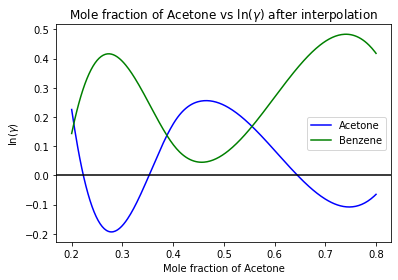

In [16]:
x_inter = np.linspace(0.2, 0.8, 300)
spline_A = interpolate.interp1d(X_A, ln_gamma_A, kind='cubic')
y_inter_A = spline_A(x_inter)
plt.plot(x_inter, y_inter_A, '-b', label="Acetone")

spline_B = interpolate.interp1d(X_A, ln_gamma_B, kind='cubic')
y_inter_B = spline_B(x_inter)
plt.plot(x_inter, y_inter_B, '-g', label="Benzene")

plt.axhline(y=0, color='k')
plt.legend()

plt.xlabel("Mole fraction of Acetone")
plt.ylabel("ln($\gamma$)")
plt.title("Mole fraction of Acetone vs ln($\gamma$) after interpolation")

plt.show()

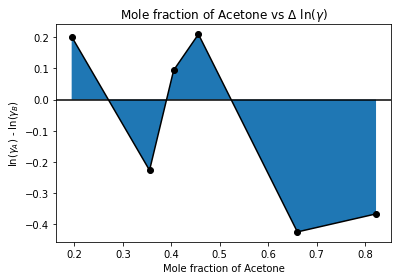

In [9]:
delta_ln_gamma = ln_gamma_A-ln_gamma_B

plt.axhline(y=0, color='k')
plt.plot(X_A, delta_ln_gamma, 'o-k')
plt.xlabel("Mole fraction of Acetone")
plt.ylabel("ln($\gamma_A$) - ln($\gamma_B$)")
plt.title("Mole fraction of Acetone vs $\Delta$ ln($\gamma$)")
plt.fill_between(X_A, 0, delta_ln_gamma)

plt.show()

Area: -0.14447233309865778


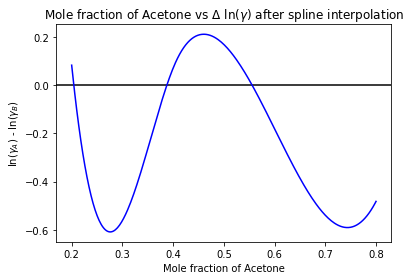

In [10]:
spline = interpolate.interp1d(X_A, delta_ln_gamma, kind='cubic')

x_inter = np.linspace(0.2, 0.8, 300)
y_inter = spline(x_inter)

plt.axhline(y=0, color='k')
plt.plot(x_inter, y_inter, '-b')
plt.title("Mole fraction of Acetone vs $\Delta$ ln($\gamma$) after spline interpolation")
plt.xlabel("Mole fraction of Acetone")
plt.ylabel("ln($\gamma_A$) - ln($\gamma_B$)")

area = 0
for i in range(len(x_inter)-1):
    area += (y_inter[i])*(x_inter[i+1]-x_inter[i])

print("Area:", area)

In [11]:
alpha = (X_B * ln_gamma_B) / (X_A * ln_gamma_A)
a = ln_gamma_A * (1 + alpha)**2
b = ln_gamma_B * (1 + 1.0/alpha)**2

print(f"Van Laar coeffecients")
print(f"a: {a}")
print(f"b: {b}")

Van Laar coeffecients
a: [-0.24528301 -1.21972077  0.37331584  0.57097702 18.02423931  1.5925    ]
b: [0.22597255 0.30300295 1.48697511 0.52717326 0.24962263 0.29139089]


In [12]:
residual = X_A * ln_gamma_A + X_B * ln_gamma_B
print('Residual: ', residual)

Residual:  [0.04992084 0.11793991 0.14067069 0.13310942 0.15701433 0.13350677]


In [13]:
K_A = Y_A / X_A
print ("K_A: " , K_A)

K_A:  [1.06504098 1.11520756 1.52183956 1.5326345  1.37736322 2.01031122]
